Sales Channel Prediction Case Study 



When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The company has to select proper sales channel to predict the right sales channel to generate good revenue. 

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_color_codes("dark")
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = (15, 8)

import warnings
warnings.filterwarnings("ignore")

In [2]:
ad=pd.read_csv('Advertising.csv')

In [3]:
ad.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# Discard first row as it just number sequence
ad1=ad.iloc[:,1:]

In [5]:
ad1.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
ad1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
ad1.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
ad1corr = ad1.corr(method='pearson')
ad1corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


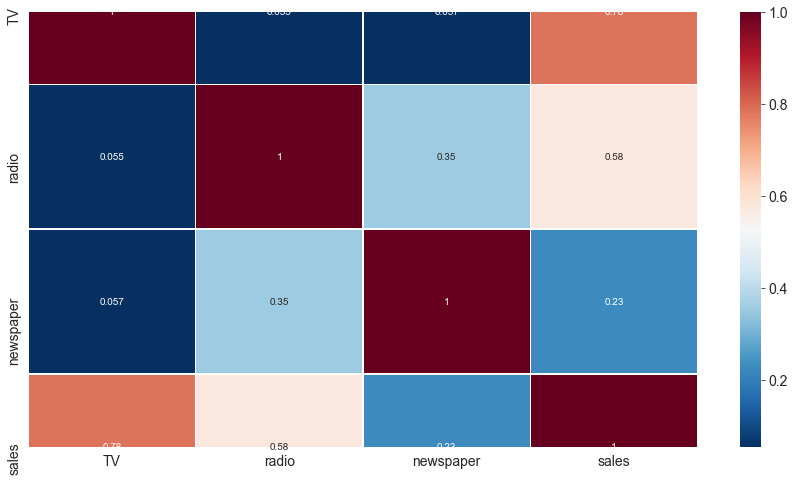

In [44]:
# Lets visualize the correlation
sns.heatmap(ad1corr, 
            xticklabels=ad1corr.columns,
            yticklabels=ad1corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

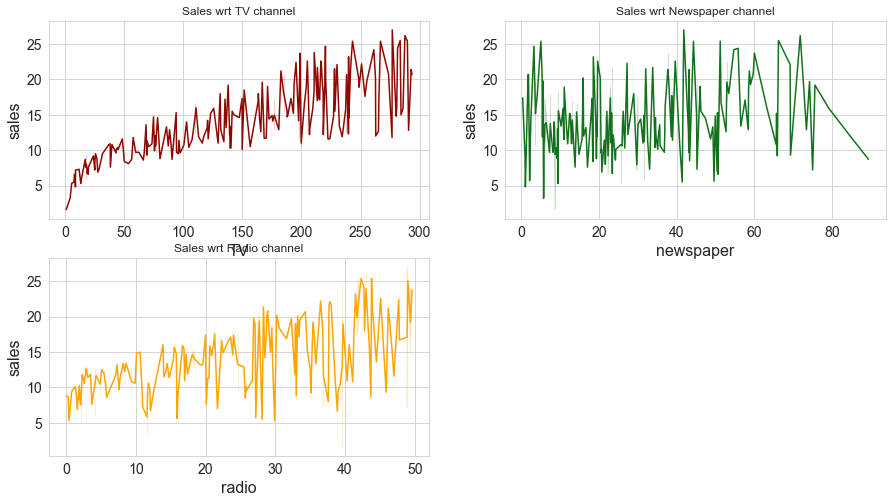

In [45]:
# Lets see how sales varies with different sales channel

plt.subplot(2,2,1)
plt.title('Sales wrt TV channel')
sns.lineplot(x='TV', y='sales', data=ad1, color='r')

plt.subplot(2,2,2)
plt.title('Sales wrt Newspaper channel')
sns.lineplot(x='newspaper', y='sales', data=ad1,color='g' )

plt.subplot(2,2,3)
plt.title('Sales wrt Radio channel')
sns.lineplot(x='radio', y='sales', data=ad1,color='orange' )
# Newspaper doesn't seem to have very noticable impact (Very constant behaviour observed). 
#On the contrary TV and follwed by radio showing positive tend 

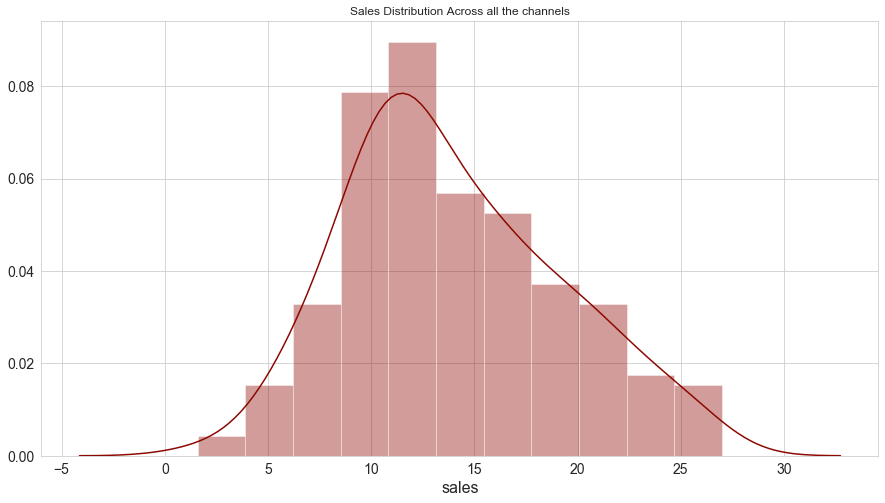

In [46]:
plt.title('Sales Distribution Across all the channels')
sns.distplot(ad1['sales'], color='r')
plt.show() # Sales distribution is quite normally distributed across the channels

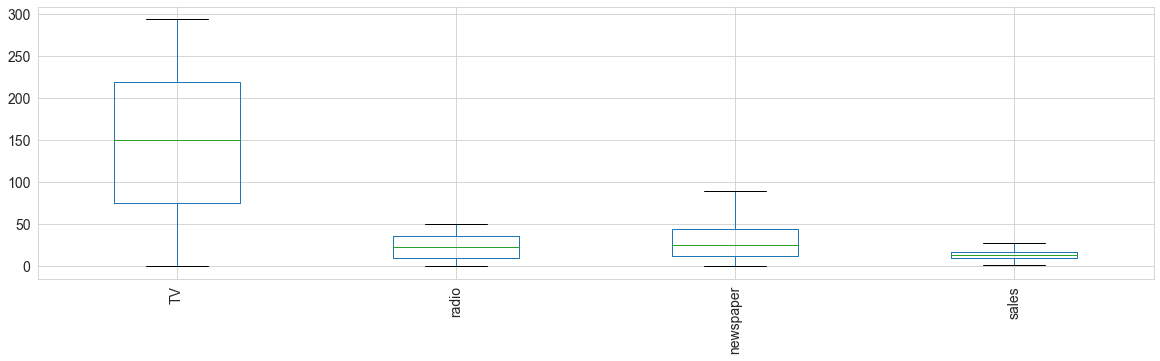

In [47]:
# Lets check the outlier in the dataset
ad1.boxplot( rot = 90, figsize=(20,5)) # There is no outlier except in newspaper channel but this is negligible.

In [13]:
# Numerical representation of the skweness in the feature set
print(ad1.skew()) # Data is fine except Newspaper column 

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64


In [14]:
from scipy import stats
z = np.abs(stats.zscore(ad1['newspaper']))
print(z)

[1.77894547 0.66957876 1.78354865 1.28640506 1.28180188 2.04592999
 0.32470841 0.87248699 1.36042422 0.43058158 0.29248614 1.22232878
 1.62704048 1.07502697 0.71100739 1.02862691 3.84117072 1.16211917
 0.56407384 0.52724839 1.05164281 0.32470841 0.87672192 0.20042252
 0.56407384 0.50883567 0.82645518 0.3523275  0.3523275  0.47164196
 0.58211831 0.37037197 0.02550162 1.39264649 1.06582061 1.01518562
 1.17629696 0.69719785 0.20926062 0.066562   0.04814928 0.37497515
 1.32359877 0.19121615 0.5867215  0.0435461  0.23687971 0.55486748
 0.89053147 0.28751471 0.18624472 1.2407415  0.41640379 1.29561142
 0.6745502  1.35545278 0.49926105 0.64232793 0.32894334 0.97836017
 0.42137522 1.11148417 0.14978752 1.0197888  0.07613662 1.3650274
 1.30518604 0.93693153 0.90010608 0.1543907  0.37497515 0.05275246
 0.51804203 0.03433973 0.80343927 2.7087881  0.45359749 0.75280428
 0.97375698 0.34312114 0.37994659 0.29211789 0.08957791 0.23227653
 0.14941927 1.61783412 0.66994701 1.50275459 1.97227908 0.95957

In [15]:
threshold = 3
print(np.where(z > 3))

(array([ 16, 101], dtype=int64),)


In [16]:
ad1 = ad1[(z < 3)]
ad.shape

(200, 5)

In [17]:
# create a feature set 
ad1_feature = ad1.drop(['sales'],axis=1)
# print the first 5 rows
ad1_feature.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [18]:
# create a target set 
ad1_target = ad1['sales'].values.reshape(-1,1)
# print the first 5 rows
#ad1_target.head()

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ad1_feature = sc.fit_transform(ad1_feature)
ad1_target = sc.fit_transform(ad1_target)

In [20]:
# importtrain_test_split library for 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ad1_feature, ad1_target, test_size= 0.25, random_state=21)

In [21]:
print(x_train.shape), print(x_test.shape), print(y_train.shape), print(y_test.shape)

(148, 3)
(50, 3)
(148, 1)
(50, 1)


(None, None, None, None)

# Linear Regression Model 

In [22]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
#To retrieve the intercept:
print("Linear Regression Intercept: ", l_reg.intercept_)
#For retrieving the slope:
print("Linear Regression coefficient: ", l_reg.coef_)

Linear Regression Intercept:  [-0.00534456]
Linear Regression coefficient:  [[ 0.75477878  0.54167528 -0.01303928]]


In [24]:
# make predictions on the testing set
y_pred_lr = l_reg.predict(x_test)

In [25]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

Mean Absolute Error: 0.23412260692875234
Mean Squared Error: 0.08522818076046161
Root Mean Squared Error: 0.2919386592427622


Lets try to reduce Root Mean Squared Error by eliminating newspaper channel. As we have already seen in lineplot sales through newspaper chhannel is relatively constant. Whereas through radio and TV it is in increasing fashion. 

In [26]:
# create a feature set to reduce error further 
ad2_feature = ad1.drop(['sales', 'newspaper'],axis=1)
# print the first 5 rows
ad2_feature.head()

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [27]:
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(ad2_feature, ad1_target, test_size= 0.25, random_state=21)

In [28]:
l_reg.fit(x_train_n, y_train_n)
# make predictions on the testing set
y_pred_lr_n = l_reg.predict(x_test_n)

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_n, y_pred_lr_n))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_n, y_pred_lr_n))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_n, y_pred_lr_n)))

Mean Absolute Error: 0.23327120969194529
Mean Squared Error: 0.08459110035995927
Root Mean Squared Error: 0.2908454922462428


There is no effect on RMSE we are able to achieve by dropping Newspaper. Lets try using one more Regression technique

# Support Vector Machine 

In [30]:
from sklearn.svm import SVR
SVM = SVR()
SVM.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [31]:
y_pred_SVM = SVM.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_SVM))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_SVM))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_SVM)))

Mean Absolute Error: 0.1367159353854034
Mean Squared Error: 0.0380594325666378
Root Mean Squared Error: 0.19508826865457032


In [32]:
# Lets see SVM on TV and radio columns only
SVM.fit(x_train_n, y_train_n)
# make predictions on the testing set
y_pred_SVM_n = SVM.predict(x_test_n)

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_n, y_pred_SVM_n))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_n, y_pred_SVM_n))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_n, y_pred_SVM_n)))

Mean Absolute Error: 0.09942310678249386
Mean Squared Error: 0.0208380991731346
Root Mean Squared Error: 0.14435407570669628


Out of two algorithm SVM Regression has shown low RMSE. 

In [39]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score
cv = KFold(n_splits=5, random_state=129)
scores = cross_val_score(SVM, x_train, y_train, cv=5, scoring="r2")
print("Mean score of Cross Validation: ", scores.mean())
print("Std of score of Cross Validation: ",scores.std())

Mean score of Cross Validation:  0.9492512971664494
Std of score of Cross Validation:  0.03900068904404157


In [40]:
# Lets check the R2 score of the test datset to analysis the overfitting and underfitting issues
r2_scr_SVM=r2_score(y_test,y_pred_SVM)
print("r2 score: ",r2_scr_SVM) # Not very high variation in the scores of cross validation and testing set. 

r2 score:  0.9670440260031464


In [41]:
# Create the submission file using SVM and submit the file. 
preds = pd.DataFrame(y_pred_SVM, columns=['SVM_pred'])
preds.to_csv('SVM_Sales.csv')

In [42]:
# Lastly Save the model for futher use
from sklearn.externals import joblib  
joblib.dump(SVM, 'Channel_Sales.pkl')

['Channel_Sales.pkl']